# Final Project
### Family Income and Expenditure Dataset

### Data Analysts: Emmanuel Aviles and Kim Andrei Lugatoc

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Family Income and Expenditure.csv')
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [2]:
df.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

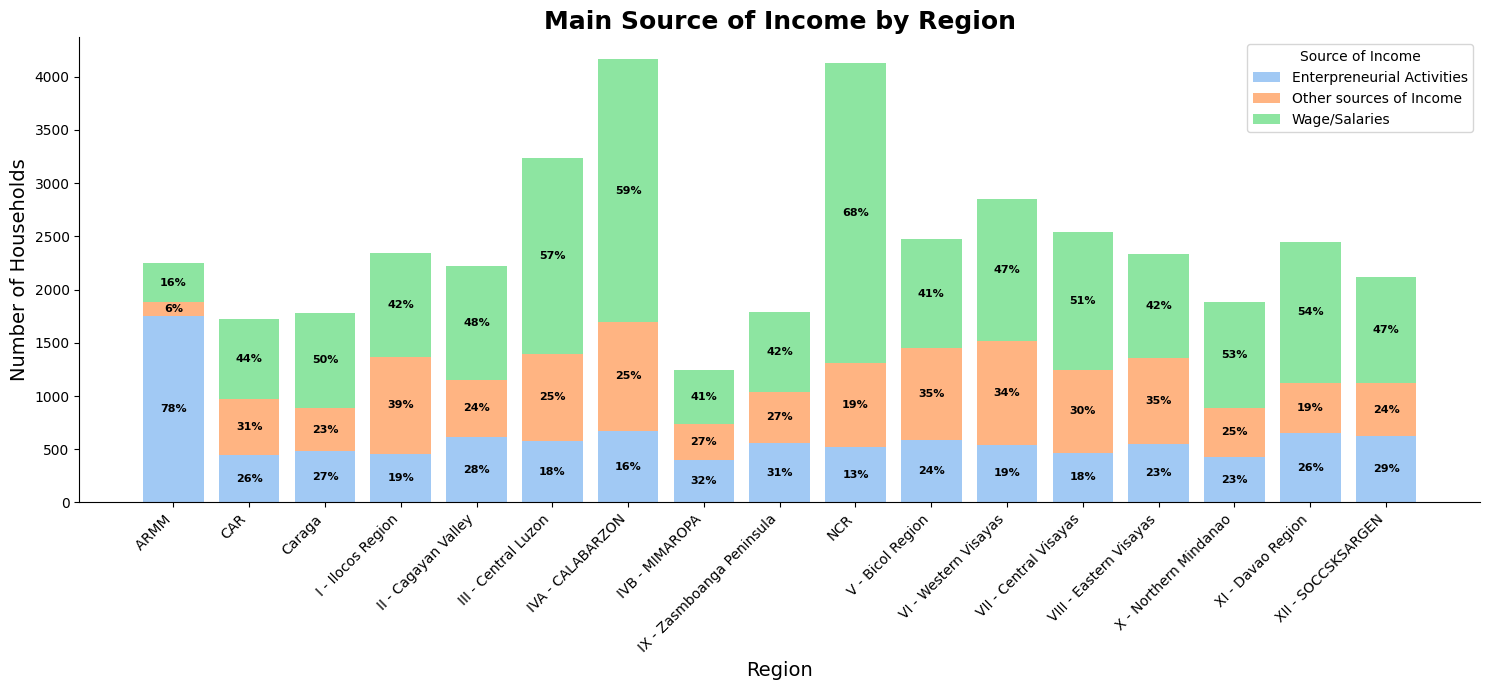

In [21]:
# Prepare the data for plotting
ct = pd.crosstab(df["Region"], df["Main Source of Income"])

# Compute percentage per region (for labeling only)
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 7))

# Track cumulative bottom for positioning
bottom = None
colors = sns.color_palette("pastel", n_colors=len(ct.columns))

# We'll store the bottom values for label positioning
cumulative = ct.copy() * 0  # same shape, zeros

for idx, col in enumerate(ct.columns):
    plt.bar(
        ct.index, 
        ct[col], 
        bottom=bottom, 
        label=col, 
        color=colors[idx]
    )
    # Update cumulative for label y-position
    if bottom is None:
        cumulative[col] = ct[col]
        bottom = ct[col]
    else:
        cumulative[col] = bottom + ct[col]
        bottom = cumulative[col]

# Now add percentage labels
for idx, col in enumerate(ct.columns):
    for i, region in enumerate(ct.index):
        pct_val = ct_pct.loc[region, col]
        count_val = ct.loc[region, col]
        if count_val > 0:  # Only label if there's at least 1 household
            # Position label in the middle of the segment
            if idx == 0:
                y_pos = ct.loc[region, col] / 2
            else:
                y_pos = (cumulative[col].loc[region] - ct.loc[region, col] / 2)
            
            # Only show if segment is tall enough to fit text (~>50 households)
            if ct.loc[region, col] >= 50:
                plt.text(
                    i, y_pos, f'{pct_val:.0f}%', 
                    ha='center', va='center', 
                    fontsize=8, fontweight='bold', color='black'
                )

plt.title("Main Source of Income by Region", fontsize=18, weight="bold")
plt.xlabel("Region", fontsize=14)
plt.ylabel("Number of Households", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Source of Income")
sns.despine()
plt.tight_layout()
plt.show()

# INSIGHT 1
### BARMM’s reliance on agriculture and fisheries helps explain why entrepreneurial (or self-owned business / informal) income is high relative to wage/salaries. The region’s land and water resources make farming and fishing natural — and those sectors get prioritized for investment.
### Because the region is promoting agri-fishery investments, it could lead to more households depending on self-employed or informal income rather than formal salaries. That fits with the bar graph’s pattern for BARMM.

https://www.pna.gov.ph/articles/1083313

# INSIGHT 2
### NCR has one of the highest totals in wages and salaries because it’s the country’s most urbanized and economically active region. It produces over 30% of the entire Philippines' GDP, making it the top contributor to the national economy. This means more companies, offices, and service jobs are based there, so households rely heavily on formal employment.
### NCR’s strong service-based economy creates a high demand for workers in business, finance, IT, retail, and government—explaining why wages/salaries dominate the income sources in your graph.

# INSIGHT 3
### CALABARZON shows high numbers across all income sources because it has one of the fastest-growing economies and a very large household population. It is the second-largest contributor to the national GDP, right after NCR. It’s also known as the country’s main industrial and manufacturing hub, with factories, tech parks, and large companies spread across Cavite, Laguna, and Batangas.

### Because the region has both industrial and service jobs, plus strong agriculture in Quezon, households earn money from a mix of salaries, businesses, and other income sources—matching the balanced but high totals seen in your bar graph.

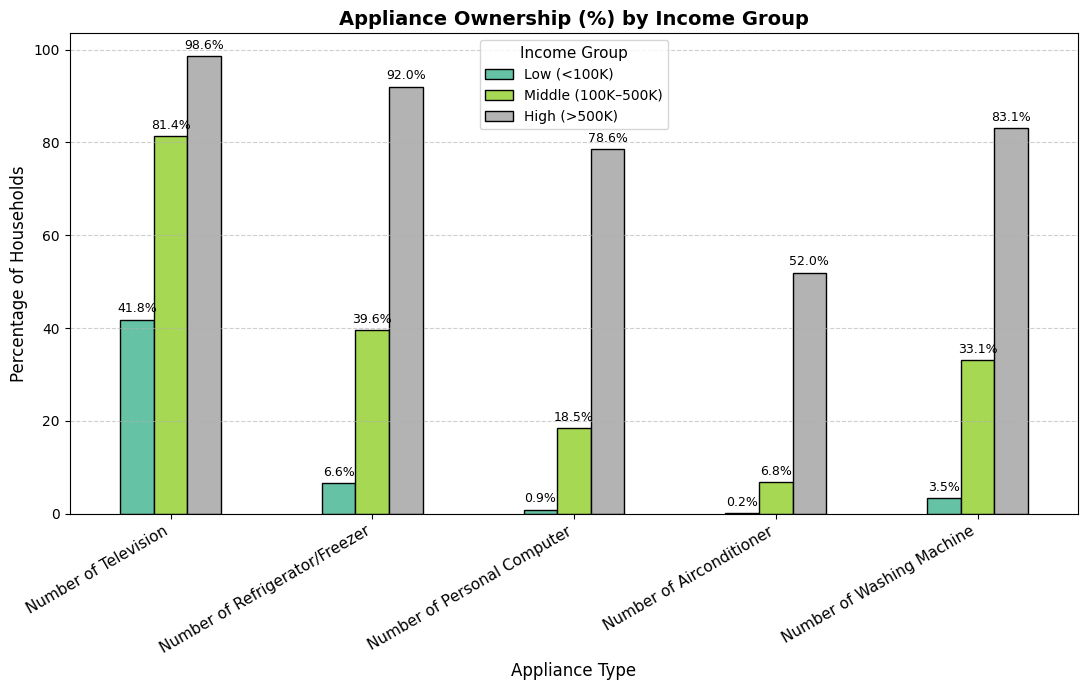

In [22]:
# Define appliance columns
appliances = [
    "Number of Television",
    "Number of Refrigerator/Freezer",
    "Number of Personal Computer",
    "Number of Airconditioner",
    "Number of Washing Machine"
]

# Create income groups
df["Income Group"] = pd.cut(
    df["Total Household Income"],
    bins=[0, 100000, 500000, df["Total Household Income"].max()],
    labels=["Low (<100K)", "Middle (100K–500K)", "High (>500K)"]
)

# Calculate % with each appliance per group
appliance_pct = {}
for app in appliances:
    pct = df.groupby("Income Group")[app].apply(lambda x: (x >= 1).mean() * 100)
    appliance_pct[app] = pct

# Convert to DataFrame
pct_df = pd.DataFrame(appliance_pct).T

# Plot
ax = pct_df.plot(kind="bar", figsize=(11, 7), colormap="Set2", edgecolor='black', linewidth=1)

plt.title("Appliance Ownership (%) by Income Group", fontsize=14, weight="bold")
plt.ylabel("Percentage of Households", fontsize=12)
plt.xlabel("Appliance Type", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=11)
plt.legend(title="Income Group", fontsize=10, title_fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add exact percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

# INSIGHT 4
### TVs are everywhere — and it shows how important entertainment is to Filipino families. 
### Televisions are the most common appliance because they’re affordable, practical, and part of everyday family life. Even lower-income households usually have one, showing how strongly Filipinos value news, entertainment, and bonding time. With so many channels and cheap options, TV remains the easiest way to stay informed and entertained.

# INSIGHT 5
### Refrigerators are now a household staple, reflecting improving comfort and convenience.
### The high number of refrigerators/freezers shows that more families can store food safely and buy groceries in bulk — something not possible for many households years ago. This hints at better nutrition, less food spoilage, and a shift toward more stable, middle-class living conditions.

# INSIGHT 6
### PC ownership reveals a clear digital gap — not everyone is fully connected yet.
### While many households have TVs, far fewer have personal computers. This shows that digital access still depends heavily on income, location, and whether there’s reliable internet service available. Urban and higher-income households are more likely to own PCs, while rural families often rely on phones instead.

# INSIGHT 7
### Washing machines are rising in popularity because they save precious time.
### More families — especially those with both parents working — now see washing machines as a necessity rather than a luxury. Owning one helps households keep up with busy schedules, reduce manual labor, and spend more time on work, family, or rest. Convenience is becoming a priority.

# INSIGHT 8
### Air conditioners remain rare because they’re costly to buy and even more costly to use.
### Low AC ownership reflects the reality that electricity in the Philippines is expensive. Even if families want better cooling, many stick to electric fans to save on monthly bills. ACs are still seen as a luxury item, especially outside wealthier or urban households.